In [1]:
%load_ext autoreload
%autoreload 2

import sys
import os
import time

import numpy as np
import mxnet as mx
import matplotlib.pyplot as plt
%matplotlib inline

sys.path.append(os.environ['REPO_DIR'] + '/utilities')
from utilities2015 import *
from metadata import *
from data_manager import *
from learning_utilities import *
from distributed_utilities import *

/usr/local/lib/python2.7/dist-packages/matplotlib/__init__.py:1405: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)
No vtk
Child returned 0


Setting environment for AWS compute node
rm -rf /shared/CSHL_data_processed/MD635/MD635_alignedTo_MD635-F63-2016.05.19-08.39.03_MD635_2_0188_cropbox.txt && mkdir -p /shared/CSHL_data_processed/MD635
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD635/MD635_alignedTo_MD635-F63-2016.05.19-08.39.03_MD635_2_0188_cropbox.txt /shared/CSHL_data_processed/MD635/MD635_alignedTo_MD635-F63-2016.05.19-08.39.03_MD635_2_0188_cropbox.txt


Child returned 1
0.66 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD635/MD635_alignedTo_MD635-F63-2016.05.19-08.39.03_MD635_2_0188_cropbox.txt && mkdir -p /shared/CSHL_data_processed/MD635
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD635/MD635_alignedTo_MD635-F63-2016.05.19-08.39.03_MD635_2_0188_cropbox.txt /shared/CSHL_data_processed/MD635/MD635_alignedTo_MD635-F63-2016.05.19-08.39.03_MD635_2_0188_cropbox.txt


Child returned 1
0.43 seconds.
File does not exist: /shared/CSHL_data_processed/MD635/MD635_alignedTo_MD635-F63-2016.05.19-08.39.03_MD635_2_0188_cropbox.txt
Child returned 0


rm -rf /shared/CSHL_data_processed/MD635/MD635_alignedTo_MD635-F63-2016.05.19-08.39.03_MD635_2_0188_cropbox.txt && mkdir -p /shared/CSHL_data_processed/MD635
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD635/MD635_alignedTo_MD635-F63-2016.05.19-08.39.03_MD635_2_0188_cropbox.txt /shared/CSHL_data_processed/MD635/MD635_alignedTo_MD635-F63-2016.05.19-08.39.03_MD635_2_0188_cropbox.txt


Child returned 1
0.42 seconds.
File does not exist: /shared/CSHL_data_processed/MD635/MD635_alignedTo_MD635-F63-2016.05.19-08.39.03_MD635_2_0188_cropbox.txt


In [2]:
download_from_s3(os.path.join(MXNET_MODEL_ROOTDIR, model_dir_name), is_dir=True, redownload=True)

NameError: name 'model_dir_name' is not defined

In [3]:
# Does not work for the mxnet version on 3/30/2017
# model_dir_name = 'Sat16ClassFinetuned'
# model_name = 'Sat16ClassFinetuned'
# model_iteration = 10
# output_symbol_name = 'flatten_output'
# mean_img = np.load(os.path.join(MODEL_ROOTDIR, model_dir_name, 'saturation_mean_224.npy'))

# model_dir_name = 'vgg16-blue'
# model_name = 'vgg16-blue'
# model_iteration = 0
# output_symbol_name = 'fc7_output'
# output_dim = 4096
# mean_img = np.load(os.path.join(MODEL_ROOTDIR, model_dir_name, 'vgg_mean.npy'))

# model_dir_name = 'vgg19'
# model_name = 'vgg19'
# model_iteration = 0
# output_symbol_name = 'fc8_output'

# model_dir_name = 'inception-bn'
# model_name = 'Inception-BN'
# model_iteration = 126
# output_symbol_name = 'flatten_output'
# mean_img = mx.nd.load(os.path.join(MODEL_ROOTDIR, model_dir_name, 'mean_224.nd'))['mean_img'].asnumpy()

model_dir_name = 'inception-bn-blue'
model_name = 'inception-bn-blue'
model_iteration = 0
output_symbol_name = 'flatten_output'
output_dim = 1024
mean_img = np.load(os.path.join(MXNET_MODEL_ROOTDIR, model_dir_name, 'mean_224.npy'))

# Reference on how to predict with mxnet model:
# https://github.com/dmlc/mxnet-notebooks/blob/master/python/how_to/predict.ipynb
model0, arg_params, aux_params = mx.model.load_checkpoint(os.path.join(MXNET_MODEL_ROOTDIR, model_dir_name, model_name), 0)
flatten_output = model0.get_internals()[output_symbol_name]
model = mx.mod.Module(context=[mx.gpu(i) for i in range(8)], 
                        symbol=flatten_output)

# model_dir_name = 'inception-bn-sat'
# model_name = 'inception-bn-sat'
# model_iteration = 0
# mean_img = np.load(os.path.join(MODEL_ROOTDIR, model_dir_name, 'mean_224.npy'))

# model = mx.model.FeedForward.load(os.path.join(MODEL_ROOTDIR, model_dir_name, model_name), model_iteration, ctx=mx.gpu())

/usr/local/lib/python2.7/dist-packages/mxnet/module/base_module.py:52: UserWarning: You created Module with Module(..., label_names=['softmax_label']) but input with name 'softmax_label' is not found in symbol.list_arguments(). Did you mean one of:
	data
  warnings.warn(msg)


In [25]:
# Visualize network topology

# a = mx.viz.plot_network(flatten_output, shape={"data":(1, 1, 224, 224)}, node_attrs={"shape":'rect',"fixedsize":'false'})
# a.render(model_name)

In [4]:
patch_size = 224
half_size = patch_size/2
stride = 56

In [27]:
# def convert_to_saturation(img, rescale=True):
#     """
#     Generate saturation channel as a grayscale image.
#     """
#     ma = img.max(axis=-1)
#     mi = img.min(axis=-1)
# #     sys.stderr.write('compute min and max color components: %.2f seconds\n' % (time.time() - t1)) # ~5s

# #     t1 = time.time()
#     s = np.nan_to_num(mi/ma.astype(np.float))
# #     sys.stderr.write('min oiver max: %.2f seconds\n' % (time.time() - t1)) # ~2s

# #     t1 = time.time()
#     if rescale:
#         pmax = s.max()
#         pmin = s.min()
#         s = (s - pmin) / (pmax - pmin)
# #     sys.stderr.write('rescale: %.2f seconds\n' % (time.time() - t1)) # ~3s

#     return img_as_ubyte(s)

In [30]:
for stack in [
 'MD593',
 'MD594',
 'MD595',
 'MD598',
 'MD599',
 'MD602',
 'MD603']:
    download_from_s3(DataManager.get_thumbnail_mask_dir_v2(stack=stack), is_dir=True)

rm -rf /shared/CSHL_data_processed/MD594/MD594_masks_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped && mkdir -p /shared/CSHL_data_processed/MD594
aws s3 cp --recursive s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_masks_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped /shared/CSHL_data_processed/MD594/MD594_masks_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped


Child returned 0
Child returned 0
3.57 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD595/MD595_masks_alignedTo_MD595-IHC48-2015.09.15-18.38.44_MD595_1_0142_cropped && mkdir -p /shared/CSHL_data_processed/MD595
aws s3 cp --recursive s3://mousebrainatlas-data/CSHL_data_processed/MD595/MD595_masks_alignedTo_MD595-IHC48-2015.09.15-18.38.44_MD595_1_0142_cropped /shared/CSHL_data_processed/MD595/MD595_masks_alignedTo_MD595-IHC48-2015.09.15-18.38.44_MD595_1_0142_cropped


Child returned 0
3.68 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD598/MD598_masks_alignedTo_MD598-N42-2015.09.29-19.26.12_MD598_2_0125_cropped && mkdir -p /shared/CSHL_data_processed/MD598
aws s3 cp --recursive s3://mousebrainatlas-data/CSHL_data_processed/MD598/MD598_masks_alignedTo_MD598-N42-2015.09.29-19.26.12_MD598_2_0125_cropped /shared/CSHL_data_processed/MD598/MD598_masks_alignedTo_MD598-N42-2015.09.29-19.26.12_MD598_2_0125_cropped


Child returned 0
3.53 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD599/MD599_masks_alignedTo_MD599-IHC40-2015.10.03-06.04.31_MD599_2_0119_cropped && mkdir -p /shared/CSHL_data_processed/MD599
aws s3 cp --recursive s3://mousebrainatlas-data/CSHL_data_processed/MD599/MD599_masks_alignedTo_MD599-IHC40-2015.10.03-06.04.31_MD599_2_0119_cropped /shared/CSHL_data_processed/MD599/MD599_masks_alignedTo_MD599-IHC40-2015.10.03-06.04.31_MD599_2_0119_cropped


Child returned 0
3.70 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD602/MD602_masks_alignedTo_MD602-N49-2015.12.01-18.41.46_MD602_2_0146_cropped && mkdir -p /shared/CSHL_data_processed/MD602
aws s3 cp --recursive s3://mousebrainatlas-data/CSHL_data_processed/MD602/MD602_masks_alignedTo_MD602-N49-2015.12.01-18.41.46_MD602_2_0146_cropped /shared/CSHL_data_processed/MD602/MD602_masks_alignedTo_MD602-N49-2015.12.01-18.41.46_MD602_2_0146_cropped


Child returned 0
4.65 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD603/MD603_masks_alignedTo_MD603-N60-2015.12.03-23.57.05_MD603_2_0179_cropped && mkdir -p /shared/CSHL_data_processed/MD603
aws s3 cp --recursive s3://mousebrainatlas-data/CSHL_data_processed/MD603/MD603_masks_alignedTo_MD603-N60-2015.12.03-23.57.05_MD603_2_0179_cropped /shared/CSHL_data_processed/MD603/MD603_masks_alignedTo_MD603-N60-2015.12.03-23.57.05_MD603_2_0179_cropped


Child returned 0
3.64 seconds.


In [33]:
for stack in [
 'MD598']:
    
    # 450 second to download entire folder one stack
    # 1025 seconds to download file by file

    download_from_s3(DataManager.get_image_dir(stack=stack, version='cropped_gray'), is_dir=True, redownload=True)
    
#     first_detect_sec, last_detect_sec = metadata_cache['section_limits'][stack]
#     for sec in range(first_detect_sec, last_detect_sec+1):
#         try:
#             download_from_s3(DataManager.get_image_filepath(stack=stack, section=sec, version='cropped_gray'), redownload=True)
#         except:
#             pass

rm -rf /shared/CSHL_data_processed/MD598/MD598_lossless_alignedTo_MD598-N42-2015.09.29-19.26.12_MD598_2_0125_cropped_gray && mkdir -p /shared/CSHL_data_processed/MD598


Child returned 0


aws s3 cp --recursive s3://mousebrainatlas-data/CSHL_data_processed/MD598/MD598_lossless_alignedTo_MD598-N42-2015.09.29-19.26.12_MD598_2_0125_cropped_gray /shared/CSHL_data_processed/MD598/MD598_lossless_alignedTo_MD598-N42-2015.09.29-19.26.12_MD598_2_0125_cropped_gray


Child returned 0
455.89 seconds.


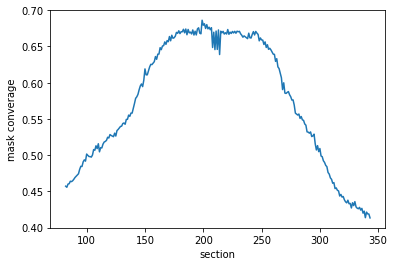

In [5]:
# This shows that a mask covers 50% to 75% of the full area, so predicting only on masks roughly halves the time.

stack = 'MD590'
image_width, image_height = metadata_cache['image_shape'][stack]
first_detect_sec, last_detect_sec = metadata_cache['section_limits'][stack]
a = image_width / 32 * image_height / 32
mask_coverage = {sec: np.count_nonzero(DataManager.load_thumbnail_mask_v2(stack=stack, section=sec))/float(a)
for sec in range(first_detect_sec, last_detect_sec+1) if not is_invalid(stack=stack, sec=sec)}
plt.plot(mask_coverage.keys(), mask_coverage.values());
plt.xlabel('section');
plt.ylabel('mask converage');

In [ ]:
# for stack in all_stacks:
for stack in [
 'MD598',
 'MD599',
 'MD602',
 'MD603']:
    
#     if stack in ['MD585', 'MD589']:
#         continue

#     image_dir = DataManager.get_image_dir(stack, resol='lossless', version='cropped')
#     download_from_s3(image_dir, is_dir=True)
    # download takes 3000 sec.

    print stack

    section_to_filename = metadata_cache['sections_to_filenames'][stack]

    image_width, image_height = metadata_cache['image_shape'][stack]
    grid_spec = (patch_size, stride, image_width, image_height)

    sample_locations = grid_parameters_to_sample_locations(grid_spec=grid_spec)

    first_detect_sec, last_detect_sec = metadata_cache['section_limits'][stack]

    bar = show_progress_bar(first_detect_sec, last_detect_sec)
    
#     for sec in range(166, 167):
    for sec in range(first_detect_sec, last_detect_sec+1):
#     for sec in range(143, last_detect_sec+1):
        
        if is_invalid(stack=stack, sec=sec):
            continue
            
#         if section_to_filename[sec].split('-')[1][0] == 'F':
#             continue
#         if section_to_filename[sec].split('-')[1][0] == 'N':
#             continue
                
        bar.value = sec
        
        sys.stderr.write('\nSection %d.\n' % sec)

        # Use grids only on mask.
        t = time.time()
        mask_tb = DataManager.load_thumbnail_mask_v2(stack=stack, section=sec)
        indices_roi = locate_patches_v2(grid_spec=grid_spec, mask_tb=mask_tb)
        sys.stderr.write('locate patches: %.2f seconds\n' % (time.time() - t))       
        
#         Use grids on the entire frame.
#         indices_roi = range(len(sample_locations))

        n = len(indices_roi)
        sys.stderr.write('%d samples.\n' % n)

        sample_locations_roi = sample_locations[indices_roi]
        
        t = time.time()
        img_fp = DataManager.get_image_filepath(stack=stack, section=sec, version='cropped_gray', resol='lossless')
        download_from_s3(img_fp)
        im = img_as_ubyte(imread(img_fp))
        sys.stderr.write('load image: %.2f seconds\n' % (time.time() - t)) # ~ 35s
        
#         t = time.time()
#         sat = convert_to_saturation(im)
#         del im
#         sys.stderr.write('Convert to saturation: %.2f seconds\n' % (time.time() - t)) # ~ 35s
#         sat = imread(DataManager.get_image_filepath(stack=stack, section=sec, version='saturation'))
        

        t = time.time()

        patches = np.array([im[y-half_size:y+half_size, x-half_size:x+half_size]
                            for x, y in sample_locations_roi]) # n x 224 x 224
        patches_mean_subtracted = patches - mean_img
        patches_mean_subtracted_input = patches_mean_subtracted[:, None, :, :] # n x 1 x 224 x 224

#         patches = np.array([im[y-half_size:y+half_size, x-half_size:x+half_size]
#                             for x, y in sample_locations_roi]) # n x 224 x 224 x 1
#         patches_mean_subtracted_input = np.rollaxis(patches, 3, 1) - mean_img # n x 3 x 224 x 224

        sys.stderr.write('extract patches: %.2f seconds\n' % (time.time() - t)) # ~ 20s / 140k patches

        # Increase batch_size to 500 does not save any time.
        batch_size = 256

        # For mxnet 0.9.4, using 80000 patches in a NDArrayIter works but using 90000 patches causes error:
        # TypeError: Invalid type '<type 'numpy.ndarray'>' for data, should be NDArray or numpy.ndarray

        t1 = time.time()
        features = np.empty((n, output_dim))
        
#         n_each_iter = 20000
        n_each_iter = 80000
        for b in range(0, n, n_each_iter):
            data_iter = mx.io.NDArrayIter(
                            patches_mean_subtracted_input[b:b+n_each_iter], 
                            batch_size = batch_size,
                            shuffle=False)
            
            # Reference on how to predict with mxnet model:
            # https://github.com/dmlc/mxnet-notebooks/blob/master/python/how_to/predict.ipynb
            model.bind(data_iter.provide_data, for_training=False)
            model.set_params(arg_params=arg_params, aux_params=aux_params, allow_missing=True)
            outputs = model.predict(data_iter, always_output_list=True)
            features[b:b+n_each_iter] = outputs[0].asnumpy()
        
        sys.stderr.write('predict: %.2f seconds\n' % (time.time() - t1)) 
        # All times below are after the first iteration (which is slow due to model loading into GPU).
        # inception-bn-blue ~125s / 48k patches on workstation single Titan X
        # inception-bn-blue ~27s / 48k patches on AWS p2.8xlarge 8 Tesla K80

    # Had to modify [model]-symbol.json according to this https://github.com/dmlc/mxnet/issues/2718
        
#         del patches_mean_subtracted_input, patches, im
        del patches_mean_subtracted_input, patches_mean_subtracted, patches, im
        
        t = time.time()

        features_fp = DataManager.get_dnn_features_filepath(stack=stack, model_name=model_name, 
                                                          section=sec)
        create_parent_dir_if_not_exists(features_fp)
        bp.pack_ndarray_file(features.astype(np.float16), features_fp) # bloscpack produces files of similar size
        
        upload_to_s3(features_fp, local_root=DATA_ROOTDIR)

        feature_locs_fp = DataManager.get_dnn_feature_locations_filepath(stack=stack, model_name=model_name, 
                                                  section=sec)
        np.savetxt(feature_locs_fp, np.c_[indices_roi, sample_locations_roi], fmt='%d %d %d')
        
        upload_to_s3(feature_locs_fp, local_root=DATA_ROOTDIR)

        sys.stderr.write('save: %.2f seconds\n' % (time.time() - t)) # ~.5s
        
# Overall time: 2.5 hours / stack, on AWS using p2.8xlarge 8 Tesla K80.

MD598


Widget Javascript not detected.  It may not be installed or enabled properly.



Section 98.
locate patches: 0.02 seconds
33347 samples.
load image: 0.18 seconds
extract patches: 3.19 seconds
/usr/local/lib/python2.7/dist-packages/mxnet/module/base_module.py:64: UserWarning: Data provided by label_shapes don't match names specified by label_names ([] vs. ['softmax_label'])
  warnings.warn(msg)
predict: 52.79 seconds


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD598/MD598-N18-2015.09.29-17.40.03_MD598_3_0054_lossless_alignedTo_MD598-N42-2015.09.29-19.26.12_MD598_2_0125_cropped/MD598-N18-2015.09.29-17.40.03_MD598_3_0054_lossless_alignedTo_MD598-N42-2015.09.29-19.26.12_MD598_2_0125_cropped_features.hdf s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD598/MD598-N18-2015.09.29-17.40.03_MD598_3_0054_lossless_alignedTo_MD598-N42-2015.09.29-19.26.12_MD598_2_0125_cropped/MD598-N18-2015.09.29-17.40.03_MD598_3_0054_lossless_alignedTo_MD598-N42-2015.09.29-19.26.12_MD598_2_0125_cropped_features.hdf


Child returned 0
1.89 seconds.


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD598/MD598-N18-2015.09.29-17.40.03_MD598_3_0054_lossless_alignedTo_MD598-N42-2015.09.29-19.26.12_MD598_2_0125_cropped/MD598-N18-2015.09.29-17.40.03_MD598_3_0054_lossless_alignedTo_MD598-N42-2015.09.29-19.26.12_MD598_2_0125_cropped_patch_locations.txt s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD598/MD598-N18-2015.09.29-17.40.03_MD598_3_0054_lossless_alignedTo_MD598-N42-2015.09.29-19.26.12_MD598_2_0125_cropped/MD598-N18-2015.09.29-17.40.03_MD598_3_0054_lossless_alignedTo_MD598-N42-2015.09.29-19.26.12_MD598_2_0125_cropped_patch_locations.txt


Child returned 0
0.77 seconds.
save: 3.42 seconds

Section 99.
locate patches: 0.02 seconds
33448 samples.
load image: 0.18 seconds
extract patches: 3.22 seconds
